3.058333333333333
1013.0
2.8549305555555557
1054.3666666666666
1.6896539750953612
32.47101271390633


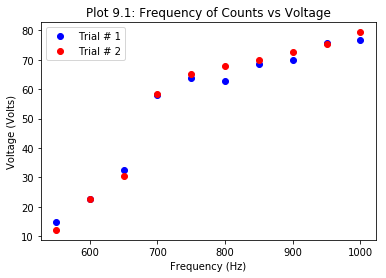

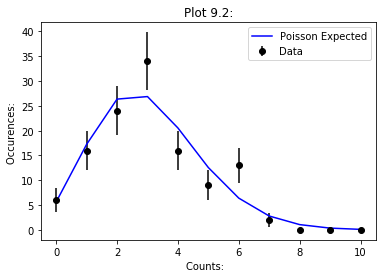

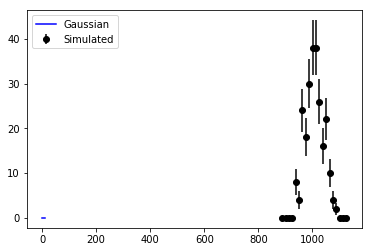

In [3]:


import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm


#Arrays for Plot 8.1

count1 = np.array([147,225,326,581,639,627,687,698,758,766])
count2 = np.array([121,227,306,584,651,679,699,727,755,794])
frequency1 = count1 / 10.0
frequency2 = count2 / 10.0
voltage = np.array([550,600,650,700,750,800,850,900,950,1000])


# Counts  800 V
counts_800V = np.array([1042,1015,1028,989,978,971,1008,999,1014,1044,1021,999,
                        1020,991,1053,994,969,1091,1057,1009,1041,1017,1002,1007,
                        1031,1007,984,1008,1035,1085,1024,999,950,1041,974,1005,
                        1016,981,974,997,973,1018,1002,1024,1038,987,1065,997,
                        1023,1031,1005,979,939,1069,1053,963,1051,1011,1081,1072,
                        1006,967,1023,1034,976,1054,1027,1066,1033,1036,1049,962,
                        994,1016,996,1061,1027,1043,990,1002,962,1001,997,969,
                        1026,1056,1031,1020,1008,950,1061,1062,940,1056,987,994,
                        1005,1014,1037,1025,1018,969,1004,994,970,1007,1023,976,973,
                        1011,1035,1069,1054,1016,1048,978,1010,970,1023,998,1042,
                        1015,1028,989,978,971,1008,999,1014,1044,1021,999,1020,991,
                        1053,994,969,1091,1057,1009,1041,1017,1002,1007,1031,1007,984,
                        1008,1035,1085,1024,999,950,1041,974,1005,1016,981,974,997,
                        973,1018,1002,1024,1038,987,1065,997,1023,1031,1005,979,939,
                        1069,1053,963,1051,1011,1081,1072,1006,967,1023,1034,976,
                        1054,1027,1066,1033,1036,1049,962,994,1016,996,1061,1027,
                        1043,990,1002,962,1001,997,969,1026,1056,1031,1020,1008,950,
                        1061,1062,940,1056,987,994,1005,1014,1037,1025,1018,969,1004,
                        994,970,1007,1023,976,973,1011,1035,1069,1054,1016,1048,
                        978,1010,970,1023,998])



# Background Decay Array

background_counts = np.array([6,1,2,1,2,3,0,3,3,2,3,3,7,4,3,7,1,5,3,5,1,2,2,2,4,3,6,1,
                              2,4,2,3,3,6,2,3,3,3,3,3,3,6,3,5,6,5,6,3,4,3,3,0,4,6,1,5,
                              4,2,1,3,2,1,3,1,3,6,2,4,0,4,5,3,1,6,0,1,5,3,1,2,3,2,4,4,
                              4,3,2,2,5,3,2,2,5,3,2,6,3,1,0,4,4,1,2,2,4,3,6,1,6,4,2,0,
                              3,6,3,1,4,3,2,2])



plt.plot(voltage,frequency1,'bo', label = 'Trial # 1')
plt.plot(voltage,frequency2,'ro', label = 'Trial # 2')
plt.title("Plot 9.1: Frequency of Counts vs Voltage")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Voltage (Volts)')
plt.legend()



# Mean Calculation
meanB = np.mean(background_counts)
meanR = np.mean(counts_800V)

# Variance Calculation
VarB = np.var(background_counts)
VarR = np.var(counts_800V)

# Std Deviation Calculation
stdDevB = pow(VarB,0.5)
stdDevR = pow(VarR,0.5)


print(meanB)
print(meanR)
print(VarB)
print(VarR)
print(stdDevB)
print(stdDevR)


plt.figure()
counts,edges = np.histogram(background_counts,bins=11,range=(0,11))
errs = counts ** 0.50
plt.errorbar(edges[:-1],counts,yerr=errs,fmt='ko',label = 'Data')

x = edges[:-1]
y = 120 * poisson.pmf(x,meanB)
plt.plot(x,y,'b-',label = 'Poisson Expected')


plt.xlabel("Counts:  ")
plt.ylabel("Occurences: ")
plt.title('Plot 9.2:')
plt.legend()

plt.figure()
counts1,edges1 = np.histogram(counts_800V,bins=20,range=(888,1138))
errs1 = counts1 ** 0.50
plt.errorbar(edges1[:-1],counts1,yerr=errs1,fmt='ko',label = 'Simulated')

x1 = (edges[:-1] + edges[1:] -1 )/2
y1 = (120*3) * norm.pdf(x1, loc=meanR, scale=stdDevR)
plt.plot(x1,y1,'b-',label = 'Gaussian')
plt.legend()



